In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/dataset/creditcard.csv', encoding='utf8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

no missing values in dataframe

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


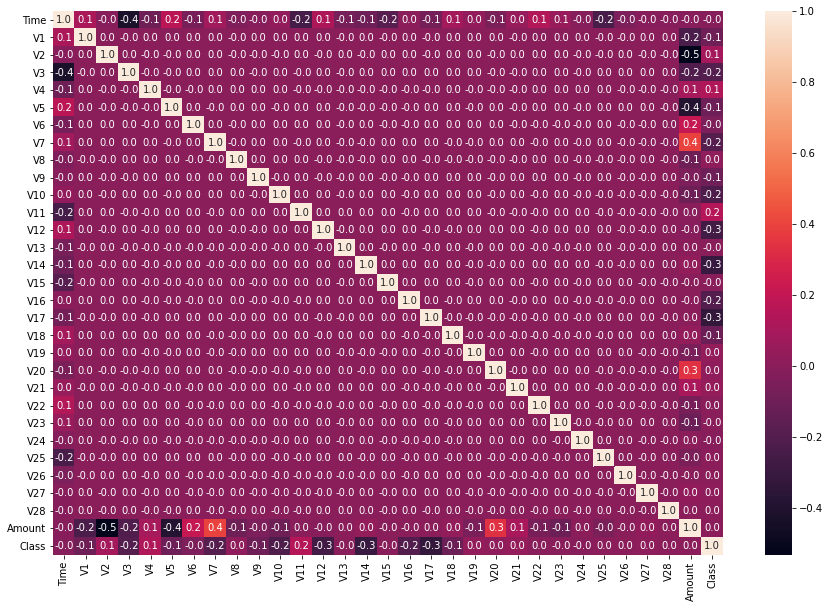

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot = True, fmt = '.1f')

In [ ]:
corrmat = df.corr()

importantfeatures = df.columns[np.abs(corrmat["Class"]) > 0.1]
print(importantfeatures)

Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'Class'],
      dtype='object')


In [4]:
# taking rows with amount less than 2126 because greater amount are just outliers somehow tries to reduce rows 
dfffff = df[df.Amount < 2126]
fraud = dfffff[dfffff['Class'] == 1].reset_index()
non_fraud = dfffff[dfffff['Class'] == 0].reset_index()
fraud = fraud.drop(columns= 'index')
non_fraud = non_fraud.drop(columns= 'index')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


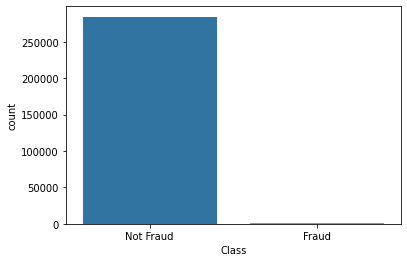

In [ ]:
g = sns.countplot(df['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [ ]:
non_fraud['Amount'].describe()

count    283712.000000
mean         81.147691
std         176.004377
min           0.000000
25%           5.550000
50%          21.980000
75%          76.300000
max        2119.240000
Name: Amount, dtype: float64

In [ ]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

average transaction amount by fraud  is 122 and frequency is 492
and by nonfraud is 87.32 with frequency 284026
ie from 577 transactions 1 is fraud so we can conclude that dataset is imbalanced and transaction of maximum amount of 25691 is so big it can dominate other features so we need to eliminate very high amount by quantile method 

In [ ]:
dfffff.Amount.describe()

count    284204.000000
mean         81.218778
std         176.183585
min           0.000000
25%           5.520000
50%          21.980000
75%          76.432500
max        2125.870000
Name: Amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


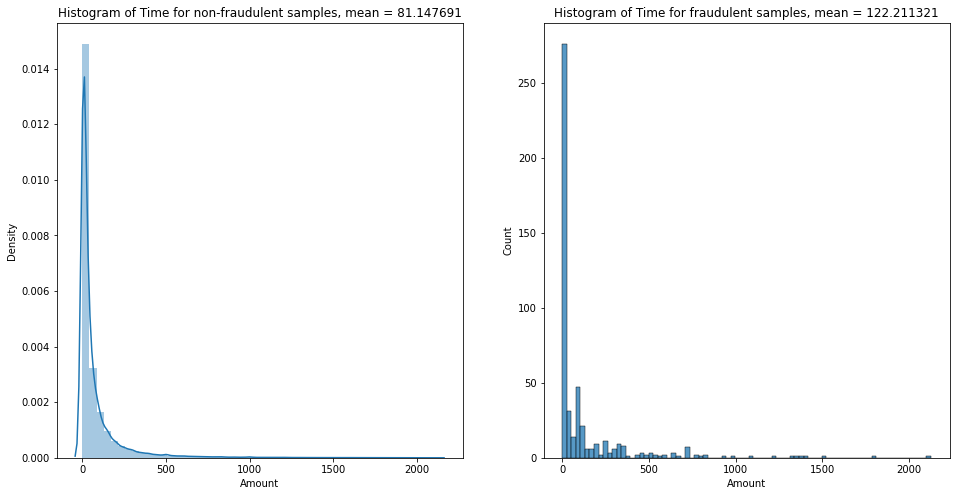

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('Histogram of Time for non-fraudulent samples, mean = %f' % (non_fraud["Amount"].mean()))
sns.distplot(non_fraud["Amount"])
plt.subplot(1, 2, 2)
plt.title('Histogram of Time for fraudulent samples, mean = %f' % (fraud["Amount"].mean()))
sns.histplot(fraud["Amount"])

disribution is almost similar on basis of transaction amount

In [ ]:
corrmat = dfffff.corr()

importantfeatures = dfffff.columns[np.abs(corrmat["Class"]) > 0.1]
print(importantfeatures)

Index(['V1', 'V3', 'V4', 'V5', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'Class'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

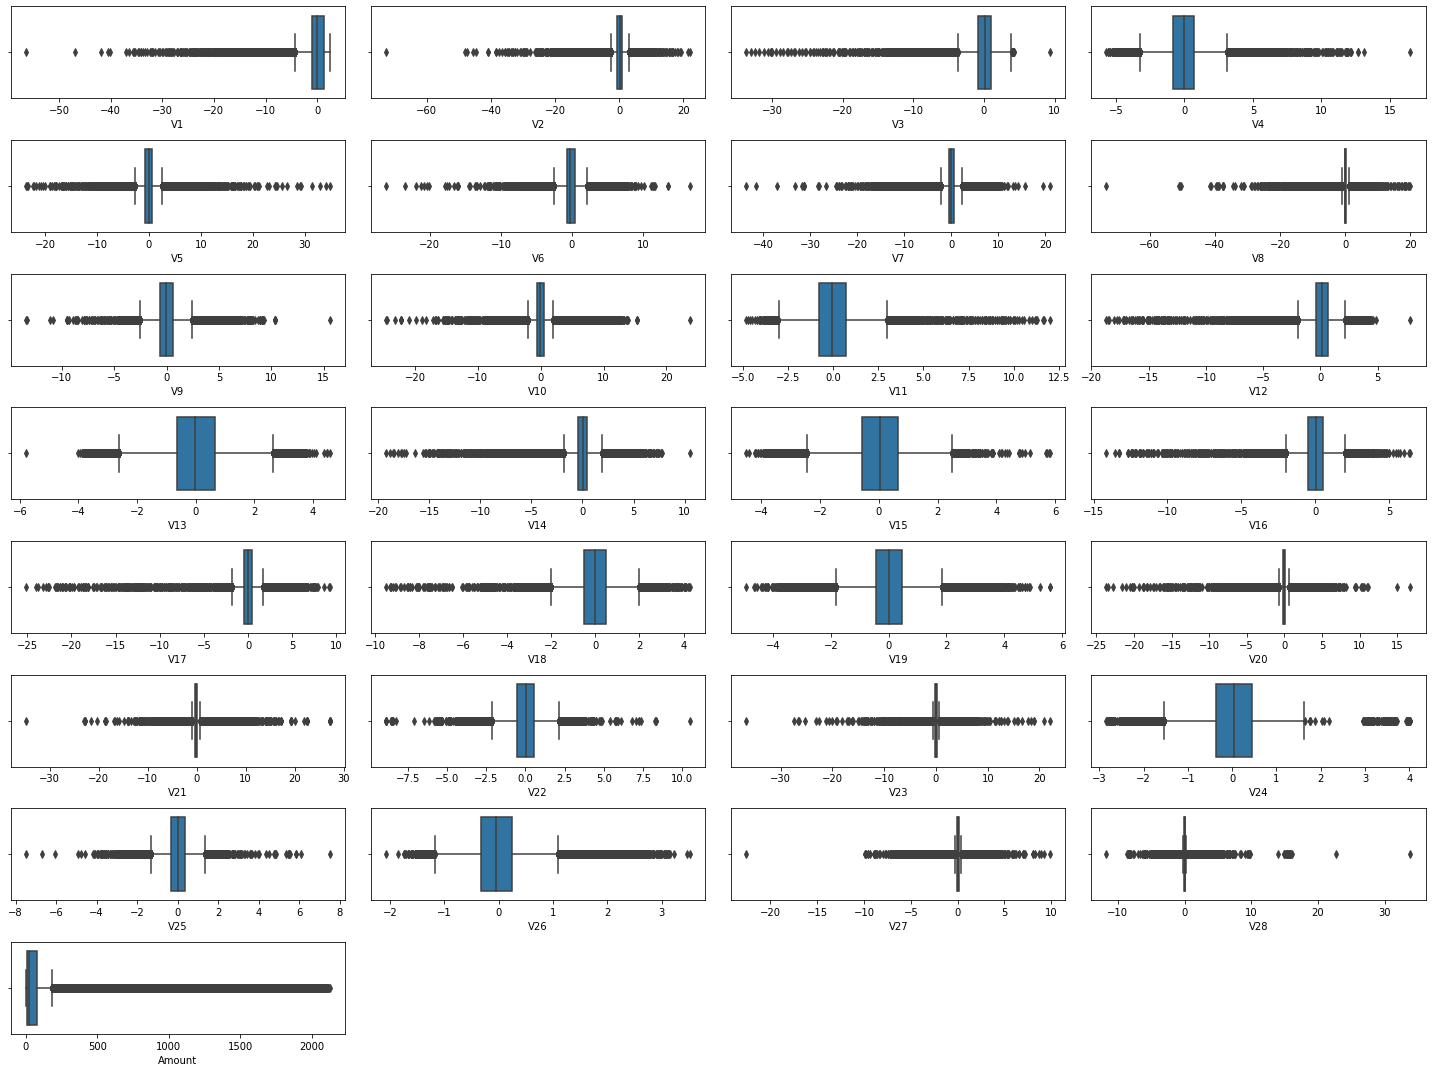

In [ ]:
import seaborn as sns
n = 1
plt.figure(figsize=(20,15))
importantfeatures = dfffff.drop(['Class','Time'],axis= 1)
for column in list(importantfeatures):
  plt.subplot(8,4,n)
  n = n+1
  sns.boxplot(dfffff[column])
  plt.tight_layout()

In [3]:
import statsmodels.api as sm
dfffff = dfffff.drop(['Time'], axis = 1)
X = dfffff.drop(['Class'], axis = 1)
y = dfffff['Class']
X_model = sm.add_constant(X)
model= sm.OLS(y, X_model).fit()
model.summary()
#checking p values found v20 and v23 having pvalues greater than 0.05 so we will remve these columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:
non_fraud = non_fraud.sample(492)
# equalising both classes rows

In [ ]:
newdata = pd.concat([fraud,non_fraud],axis = 0)
newdata = newdata.drop(['Time'], axis = 1)
X = newdata.drop(['Class'], axis = 1)
y = newdata['Class']
X_model = sm.add_constant(X)
model= sm.OLS(y, X_model).fit()
model.summary()

# pvalues greater than 0.05 are removed in the last ie v12

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     62.70
Date:                Tue, 15 Jun 2021   Prob (F-statistic):          2.67e-198
Time:                        07:11:32   Log-Likelihood:                -189.32
No. Observations:                 984   AIC:                             438.6
Df Residuals:                     954   BIC:                             585.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.016     10.840      0.000       0.146       0.210
V1            -0.0279      0.006     -4.803      0.000      -0.039      -0.016
V2            -0.0117      0.012     -1.011      0.313      -0.034       0.011
V3            -0.0055      0.007     -0.747      0.455      -0.020       0.009
V4             0.0677      0.008      8.800      0.000       0.053       0.083
V5             0.0005      0.012      0.040      0.968      -0.022       0.023
V6            -0.0115      0.010     -1.119      0.264      -0.032       0.009
V7             0.0353      0.013      2.668      0.008       0.009       0.061
V8            -0.0156      0.005     -2.841      0.005      -0.026      -0.005
V9             0.0132      0.009      1.397      0.163      -0.005       0.032
V10           -0.0268      0.009     -3.099      0.002      -0.044      -0.010
V11            0.0036      0.010      0.373      0.709      -0.015       0.022
V12            0.0116      0.008      1.413      0.158      -0.005       0.028
V13           -0.0231      0.010     -2.341      0.019      -0.042      -0.004
V14           -0.0497      0.007     -7.388      0.000      -0.063      -0.037
V15           -0.0074      0.011     -0.687      0.492      -0.029       0.014
V16            0.0148      0.012      1.236      0.217      -0.009       0.038
V17           -0.0088      0.008     -1.127      0.260      -0.024       0.007
V18            0.0195      0.013      1.526      0.127      -0.006       0.045
V19            0.0103      0.011      0.941      0.347      -0.011       0.032
V20            0.0197      0.017      1.154      0.249      -0.014       0.053
V21            0.0218      0.008      2.797      0.005       0.007       0.037
V22            0.0426      0.015      2.912      0.004       0.014       0.071
V23           -0.0299      0.015     -1.964      0.050      -0.060   -2.78e-05
V24            0.0026      0.018      0.142      0.887      -0.034       0.039
V25           -0.0035      0.018     -0.193      0.847      -0.039       0.032
V26           -0.0673      0.022     -3.051      0.002      -0.111      -0.024
V27           -0.0034      0.012     -0.275      0.783      -0.027       0.021
V28            0.1036      0.027      3.807      0.000       0.050       0.157
Amount      5.615e-05      0.000      0.453      0.651      -0.000       0.000
==============================================================================
Omnibus:                       75.379   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.022
Skew:                           0.749   Prob(JB):                     1.04e-20
Kurtosis:                       3.058   Cond. No.                         831.
==============================================================================

W

taking threshhold of 0.05 removing p values greater than 0.05 ie v20 and v23 column

In [ ]:
newdata

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168360,-0.464384,1.214551,-0.513103,0.073976,-0.040067,-0.535978,1.984671,-0.588531,-0.459705,-0.686357,-0.402845,-0.166217,0.343433,-1.094570,0.370258,-0.295149,0.997812,-0.160089,0.954472,-0.155956,-0.168045,-0.239770,-0.054737,-0.120839,-0.669856,0.511946,-0.134157,0.160962,192.78,0
37108,-1.332678,-0.161146,2.484358,-0.920916,-0.998218,0.670560,0.689807,0.088641,0.766021,-0.711452,0.949785,0.071529,-1.937421,-0.436722,-1.053423,-0.085434,-0.011644,-0.396898,-0.120319,-0.253289,-0.182839,-0.218818,-0.153908,0.257805,-0.069618,0.820843,-0.362525,-0.152936,178.89,0
244071,0.063067,-0.020164,1.075209,-0.871202,-0.132054,0.699027,-0.209215,0.436104,0.582901,-0.528962,0.127185,0.157827,-0.588160,-0.151550,-0.171071,1.042809,-1.103825,0.843935,-0.140480,-0.047861,0.139493,0.308058,0.163465,0.214048,-0.785992,0.389500,0.002818,0.007643,47.85,0
88665,-1.612596,-1.390659,1.206780,-2.904725,-0.164564,-0.517351,-1.207555,0.850514,-2.408346,0.397611,0.971312,-0.711301,-1.147322,0.404846,-0.654323,0.071195,0.406047,-0.427968,-2.175527,-0.421130,-0.117925,-0.673736,0.195313,-0.399715,-0.599579,-0.803482,0.020460,-0.118413,16.98,0


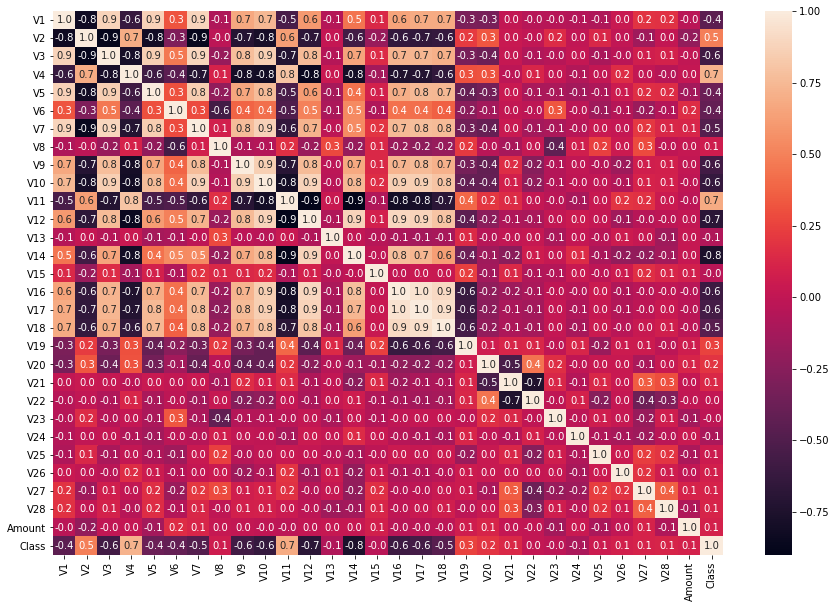

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(newdata.corr(), annot = True, fmt = '.1f')

# on equalising dataset we can find correlated pairs

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfx = scaler.fit_transform(dfffff.iloc[:,:-1])
dfx = pd.DataFrame(dfx, columns = list(dfffff)[:-1])
dfxx = pd.concat([dfx,dfffff['Class']],axis = 1).dropna().reset_index(drop = True)'''
impolist = []
fraudd = dfffff[dfffff['Class']==1]
for i in range(0,576):
  non_ffraud = dfffff[dfffff['Class']==0].iloc[492*i:492*(i+1)]
  newdataa = pd.concat([fraudd,non_ffraud],axis = 0)
  corrmat = newdataa.corr()
  importantfeatures = newdataa.columns[np.abs(corrmat["Class"]) > 0.7]
  impolist.append(importantfeatures)
  print(importantfeatures)

print(impolist)


#check columns having greater correlation with target by dividing normal class datasets into subsets 
#having equal rows to other class then joining every subset of normal class one by one with fraud and getting correlated values
#now we are getting 'V4','V9' ,'V11', 'V12', 'V14' in almost iteration so we will take these columns

Index(['V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V14', 'Class'], dtype='object')
Index(['V4', 'V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V12', 'V14', 'Class'], dtype='object')
Index(['V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V12', 'V14', 'Class'], dtype='object')
Index(['V4', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V4', 'V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='object')
Index(['V9', 'V14', 'Class'], dtype='

In [ ]:
dfx[0]

In [ ]:
list(dfffff)[:-1]

In [ ]:
X = newdata[['V4','V9' ,'V11', 'V12', 'V14']]
y = newdata['Class']
X_model = sm.add_constant(X)
model= sm.OLS(y, X_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 1.526e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:15:59   Log-Likelihood:             5.3439e+05
No. Observations:              284204   AIC:                        -1.069e+06
Df Residuals:                  284198   BIC:                        -1.069e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017   6.92e-05     25.235      0.000       0.002       0.002
V4             0.0040   4.92e-05     80.383      0.000       0.004       0.004
V9            -0.0037   6.31e-05    -58.916      0.000      -0.004      -0.004
V11            0.0063   6.79e-05     93.212      0.000       0.006       0.006
V12           -0.0109   6.93e-05   -156.882      0.000      -0.011      -0.011
V14           -0.0131   7.23e-05   -181.723      0.000      -0.013      -0.013
==============================================================================
Omnibus:                   590663.328   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2049505804.694
Skew:                          18.004   Prob(JB):                         0.00
Kurtosis:                     417.460   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can conclude that V4,V11,V12,V14 are most collinear with our class

In [ ]:
X = newdata[['V4' , 'V14']]
y = newdata['Class']
X_model = sm.add_constant(X)
model= sm.OLS(y, X_model).fit()
model.summary()

#removed v12 and v9 and v11 becuase v12 is correlated with v14 and in first ols report we are getting v12 as high p value and v9 and v11 are removed on making correlation threshold to 0.8 with target
#their is increase in r squared and adj r squared on removing theses

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     745.8
Date:                Tue, 15 Jun 2021   Prob (F-statistic):          1.19e-197
Time:                        07:32:53   Log-Likelihood:                -259.36
No. Observations:                 984   AIC:                             524.7
Df Residuals:                     981   BIC:                             539.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2038      0.013     16.117      0.000       0.179       0.229
V4             0.0509      0.005      9.597      0.000       0.040       0.061
V14           -0.0526      0.004    -14.616      0.000      -0.060      -0.046
==============================================================================
Omnibus:                       90.331   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.020
Skew:                           0.827   Prob(JB):                     1.74e-25
Kurtosis:                       2.795   Cond. No.                         8.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
168360    0
37108     0
244071    0
88665     0
6045      0
Name: Class, Length: 984, dtype: int64

DROP COLUMNS having p values greater than 0.05

*   List item
*   List item



In [11]:
from sklearn import  metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , classification_report
# again here creating datasets by combining normal subsets and fraud dataset and averaging the scores to get results 
classifiers = {
    "GaussianNB": GaussianNB(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()
}
from sklearn.model_selection import train_test_split
from  statistics import mean
score = []
from sklearn.model_selection import cross_val_score
fraudd = dfffff[dfffff['Class']==1]
for key, classifier in classifiers.items():
  accuracyscore = []
  recall = []
  precision = []
  fscore = []

  for i in range(0,575):
    non_ffraud = dfffff[dfffff['Class']==0].iloc[492*i:492*(i+1)]
    #non_ffraudtest = dfffff[dfffff['Class']==0].iloc[492*(i+1):492*(i+2)]
    newdataatrain = pd.concat([fraudd,non_ffraud],axis = 0).dropna()
    X_train,X_test,y_train,y_test = train_test_split(newdataatrain[['V4' , 'V14']],newdataatrain['Class'],stratify  = newdataatrain['Class'], test_size=0.2)
    X = newdataatrain[['V4' , 'V14']]
    y = newdataatrain['Class']
    #X_test = fraudd[['V4' , 'V14']]
    #y_test = fraudd['Class']
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_test)
    training_score = cross_val_score(classifier, X, y, cv=10)
    accuracyscore.append(round(training_score.mean(), 2) * 100)
    recall.append(metrics.recall_score(y_test,y_preds))
    precision.append(metrics.precision_score(y_test,y_preds))
    fscore.append(metrics.f1_score(y_test,y_preds))

  print("accuracy",mean(accuracyscore),"recal",mean(recall),"precsion",mean(precision),"fscore",mean(fscore),classifier.__class__.__name__)
# ransom forest works well we will use this model

accuracy 92.58608695652174 recal 0.885155548385362 precsion 0.9630980196494286 fscore 0.9220665347198435 GaussianNB
accuracy 93.13913043478261 recal 0.9006831401862457 precsion 0.9620916495751844 fscore 0.9300039145223715 KNeighborsClassifier
accuracy 92.93565217391304 recal 0.8777361906554453 precsion 0.9806715108207698 fscore 0.9258891693534886 SVC
accuracy 93.2104347826087 recal 0.9135486183933389 precsion 0.9525328109200368 fscore 0.9322506219652905 RandomForestClassifier
accuracy 93.38434782608695 recal 0.9126641750244234 precsion 0.9562965096865065 fscore 0.9335684620941688 XGBClassifier


In [12]:
accuracyscore = []
recall = []
precision = []
fscore = []
classifier = RandomForestClassifier()
for i in range(0,575):
  non_ffraud = dfffff[dfffff['Class']==0].iloc[492*i:492*(i+1)]
  #non_ffraudtest = dfffff[dfffff['Class']==0].iloc[492*(i+1):492*(i+2)]
  newdataatrain = pd.concat([fraudd,non_ffraud],axis = 0).dropna()
  X_train,X_test,y_train,y_test = train_test_split(newdataatrain[['V4' , 'V14']],newdataatrain['Class'],stratify  = newdataatrain['Class'], test_size=0.2)
  X = newdataatrain[['V4' , 'V14']]
  y = newdataatrain['Class']
  #X_test = fraudd[['V4' , 'V14']]
  #y_test = fraudd['Class']
  classifier.fit(X_train, y_train)
  y_preds = classifier.predict(X_test)
  training_score = cross_val_score(classifier, X, y, cv=10)
  accuracyscore.append(round(training_score.mean(), 2) * 100)
  recall.append(metrics.recall_score(y_test,y_preds))
  precision.append(metrics.precision_score(y_test,y_preds))
  fscore.append(metrics.f1_score(y_test,y_preds))


In [35]:
import numpy as np
for j in np.arange(1,0.5,-0.0000001):
  accuracyy = [i for i, x in enumerate(accuracyscore) if x > j]
  recally = [i for i, x in enumerate(recall) if x > j]
  precisiony = [i for i, x in enumerate(precision) if x > j]
  fscorey = [i for i, x in enumerate(fscore) if x > j]
  c = list(set(accuracyy) & set(recally) & set(precisiony) & set(fscorey))
  if len(c) > 0:
    break

print(c,j)

# we will train on dataset of i = 316 because this is common index of subset of normal which giving maximum score of accuracy recally precision fscore


[316] 0.9799999000105272


In [38]:
non_ffraud = dfffff[dfffff['Class']==0].iloc[492*316:492*(316+1)]
datatotrain = pd.concat([fraudd,non_ffraud],axis = 0).dropna()
X = datatotrain[['V4' , 'V14']]
y = datatotrain['Class']

In [39]:
X

,V4,V14
541,3.997906,-4.289254
623,2.288644,-1.692029
4920,2.330243,-1.470102
6108,2.679787,-6.771097
6329,4.732795,-6.079337
...,...,...
156636,-1.021146,2.042360
156637,4.090177,1.902180
156638,-0.304652,0.923212
156639,-0.288917,1.952509


In [40]:
y

541       1
623       1
4920      1
6108      1
6329      1
         ..
156636    0
156637    0
156638    0
156639    0
156640    0
Name: Class, Length: 984, dtype: int64

In [41]:
clf = RandomForestClassifier()
#training on dataset created by combining normal class subset and fraud class dataset
clf.fit(X, y)

import joblib
joblib.dump(clf, '/content/drive/My Drive/dataset/assesment.pkl')


['/content/drive/My Drive/dataset/assesment.pkl']

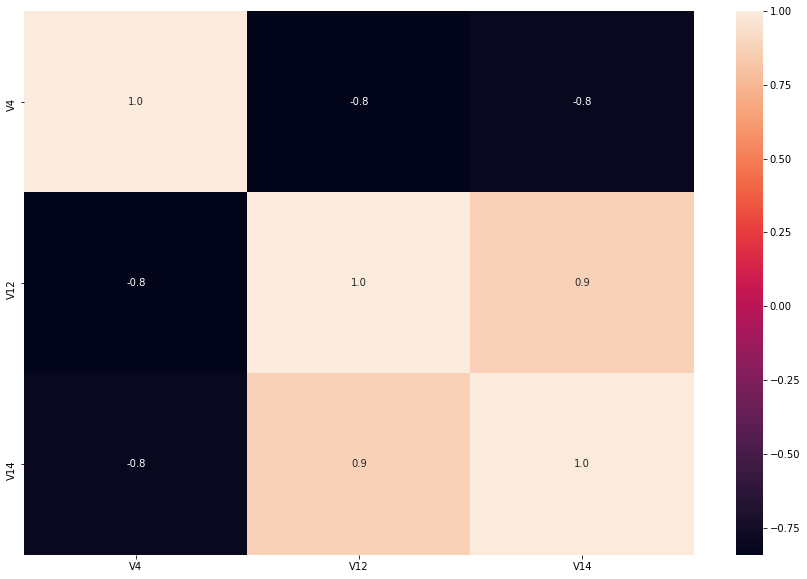

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(newdata[['V4' , 'V12', 'V14']].corr(), annot = True, fmt = '.1f')